In [5]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
sns.set_palette('colorblind')

In [23]:
seg_df = []
for csv in Path('nanonets_extracted_csvs/stage3_final_clean').glob("*.csv"):
    seg_df.append(pd.read_csv(csv, sep='\t'))
seg_df = pd.concat(seg_df)
seg_df = seg_df.drop(['Page', 'Duration_calc'], axis=1)

confinement_reason_tidy = {'Covid - 19': 'COVID-19', 
                           'OWN REQUEST': 'Own Request',
                           'PROTECTION': 'Protection',
                           'SAFETY OF OTHERS': 'Safety of Others',
                           'Security of Correctional Faci': 'Security of Correctional Facility'}
seg_df['Confinement Reason'] = seg_df['Confinement Reason'].apply(lambda x: confinement_reason_tidy[x] if x in confinement_reason_tidy else x)
seg_df.to_csv('parsed_clean_correctional_segregration_data.csv', sep='\t', index=False)

In [98]:
seg_sum = seg_df.groupby(['Correctional Facility', 'Confinement Reason', 'Ethnic Origin'])['Duration'].sum()
seg_sum = seg_sum.reset_index().rename(columns={'Duration': 'Total Segregation Duration (Days)'})
seg_sum = seg_sum.set_index(['Correctional Facility', 'Confinement Reason', 'Ethnic Origin'])
seg_num = seg_df.groupby(['Correctional Facility', 'Confinement Reason', 'Ethnic Origin']).size()
seg_num = seg_num.reset_index(name='Segregations (Distinct Events)').set_index(['Correctional Facility', 'Confinement Reason', 'Ethnic Origin'])
seg_sum['Segregations (Distinct Events)'] = seg_num['Segregations (Distinct Events)']
seg_sum = seg_sum.reset_index()
seg_sum.to_csv('segregation_by_facility_type_and_ethnicity.csv', sep='\t', index=False)

In [163]:
seg_sum

,Correctional Facility,Confinement Reason,Ethnic Origin,Total Segregation Duration (Days),Segregations (Distinct Events)
0,Cape Breton Correctional Facility,Alleged or Breached Rule,ANS,3,2
1,Cape Breton Correctional Facility,Alleged or Breached Rule,BLA,4,1
2,Cape Breton Correctional Facility,Alleged or Breached Rule,CAU,352,149
3,Cape Breton Correctional Facility,Alleged or Breached Rule,IND,171,72
4,Cape Breton Correctional Facility,Alleged or Breached Rule,OTH,11,4
...,...,...,...,...,...
120,Southwest NS Correctional Facility,COVID-19,Redacted,23,12
121,Southwest NS Correctional Facility,COVID-19,UNK,15,7
122,Southwest NS Correctional Facility,Housed with Privileges,CAU,14,2
123,Southwest NS Correctional Facility,Housed with Privileges,IND,5,2


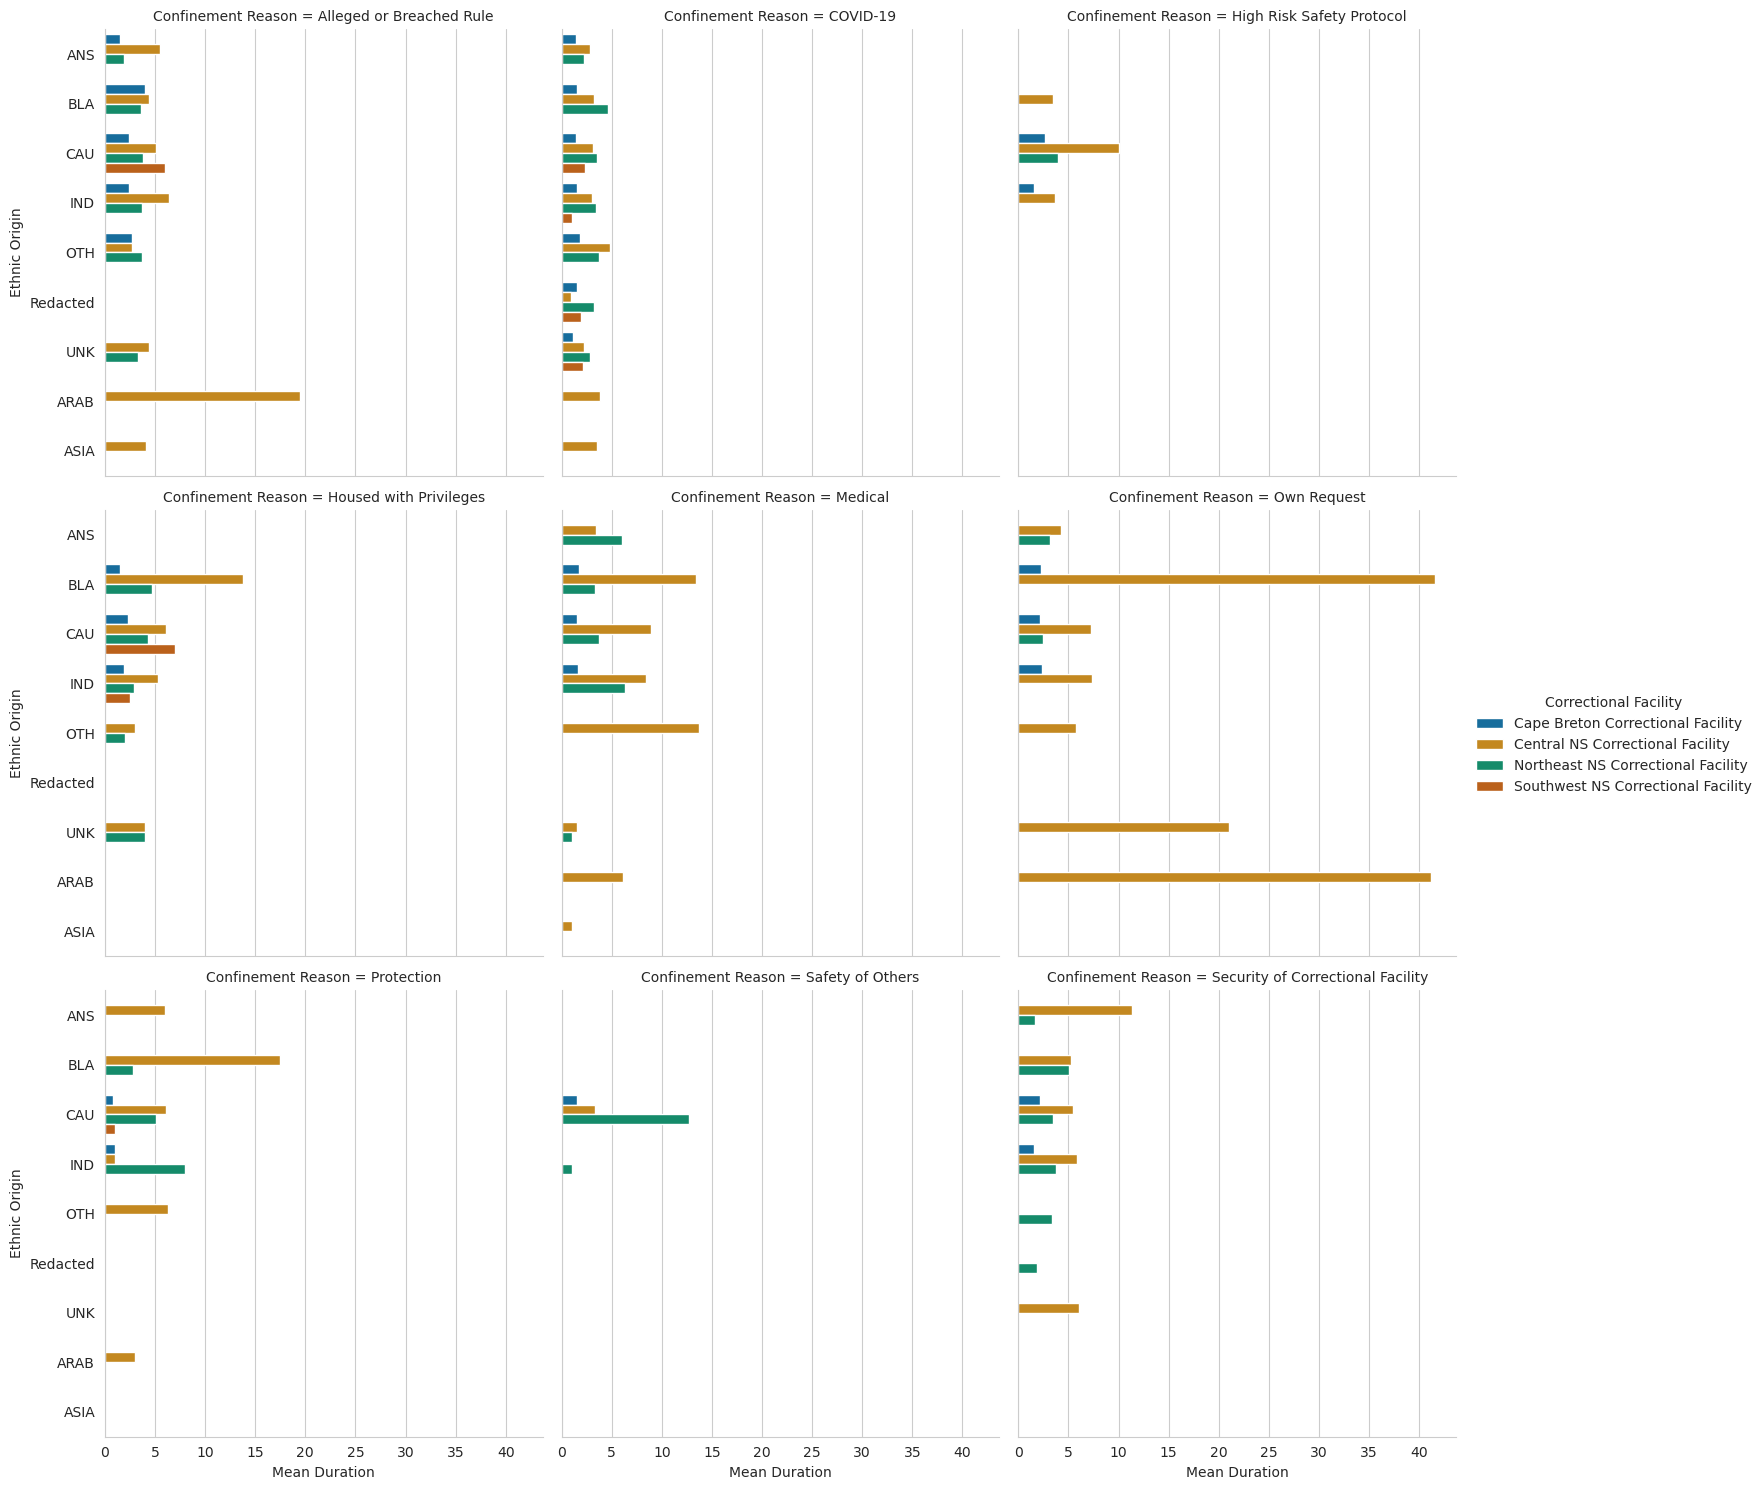

In [164]:
seg_mean = seg_df.groupby(['Correctional Facility', 'Confinement Reason', 'Ethnic Origin'])['Duration'].mean()
seg_mean = seg_mean.reset_index(name='Mean Duration')
sns.catplot(data=seg_mean, kind='bar', col='Confinement Reason', col_wrap=3, hue='Correctional Facility', x='Mean Duration', y='Ethnic Origin')
plt.savefig('mean_seg_all_plots.png', dpi=300, bbox_inches='tight')

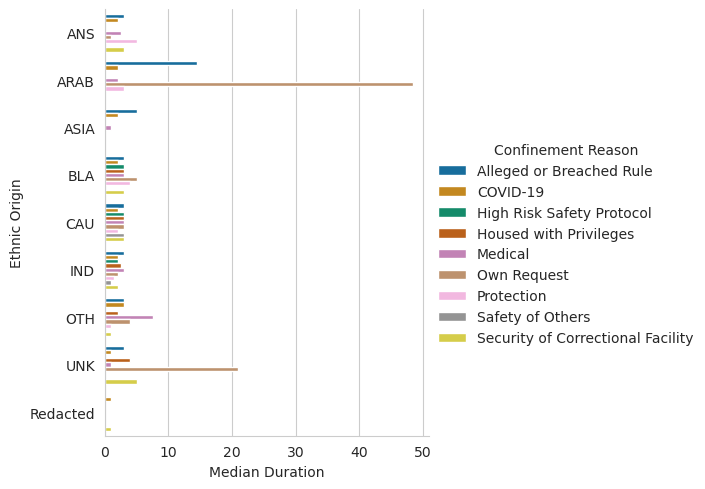

In [116]:
seg_mean = seg_df.groupby(['Confinement Reason', 'Ethnic Origin'])['Duration'].median().reset_index(name='Median Duration')
sns.catplot(data=seg_mean, x='Median Duration', y='Ethnic Origin', hue='Confinement Reason', kind='bar')
plt.savef

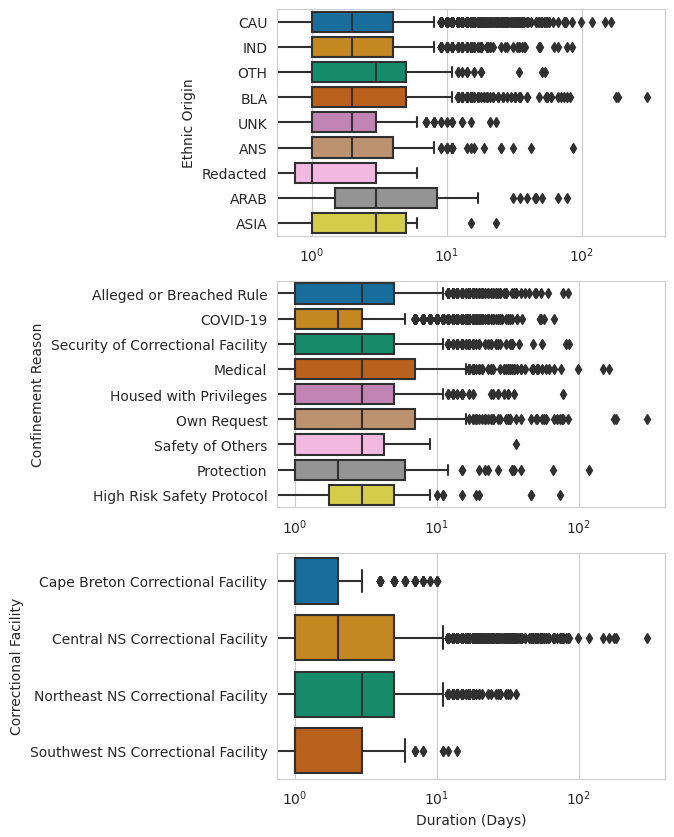

In [165]:
fig, axes = plt.subplots(3, 1, figsize=(5,10))
sns.boxplot(data=seg_df, x='Duration', y='Ethnic Origin', ax=axes[0])
axes[0].set_xscale('log')
axes[0].set_xlabel('')

sns.boxplot(data=seg_df, x='Duration', y='Confinement Reason', ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_xlabel('')

sns.boxplot(data=seg_df, x='Duration', y='Correctional Facility', ax=axes[2])
axes[2].set_xscale('log')
axes[2].set_xlabel('Duration (Days)')

plt.savefig('seg_durations.png', dpi=300,  bbox_inches='tight')

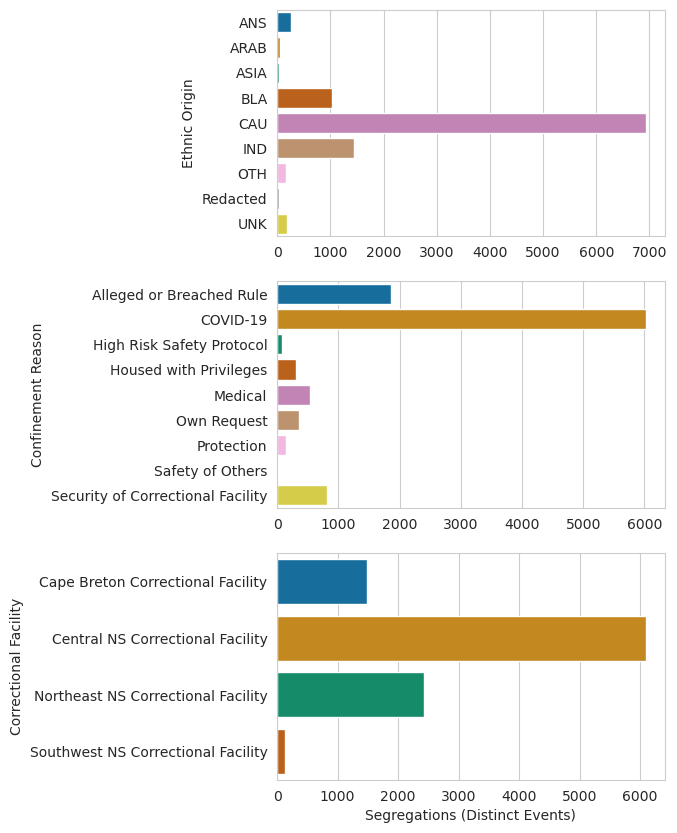

In [166]:
fig, axes = plt.subplots(3, 1, figsize=(5,10))
sns.barplot(data=seg_df.groupby(['Ethnic Origin']).size().reset_index(name='Segregations (Distinct Events)'), 
            x='Segregations (Distinct Events)', y='Ethnic Origin', ax=axes[0])
#axes[0].set_xscale('log')
axes[0].set_xlabel('')

sns.barplot(data=seg_df.groupby(['Confinement Reason']).size().reset_index(name='Segregations (Distinct Events)'), 
            x='Segregations (Distinct Events)', y='Confinement Reason', ax=axes[1])
axes[1].set_xlabel('')

sns.barplot(data=seg_df.groupby(['Correctional Facility']).size().reset_index(name='Segregations (Distinct Events)'), 
            x='Segregations (Distinct Events)', y='Correctional Facility', ax=axes[2])
axes[2].set_xlabel('Segregations (Distinct Events)')

plt.savefig('seg_number.png', dpi=300,  bbox_inches='tight')

In [150]:
sns.barplot(data=seg_df, x='Confinement Reason', y=)

TypeError: Horizontal orientation requires numeric `x` variable.

In [154]:
seg_df.groupby(['Confinement Reason']).size().reset_index(name='Segregations (Distinct Events)')

,Confinement Reason,Segregations (Distinct Events)
0,Alleged or Breached Rule,1855
1,COVID-19,6028
2,High Risk Safety Protocol,72
3,Housed with Privileges,305
4,Medical,536
5,Own Request,365
6,Protection,148
7,Safety of Others,16
8,Security of Correctional Facility,819


In [24]:
seg_counts = seg_df.groupby(['Correctional Facility', 'Confinement Reason'])['Ethnic Origin'].value_counts().reset_index(name='Number of Segregation Events')

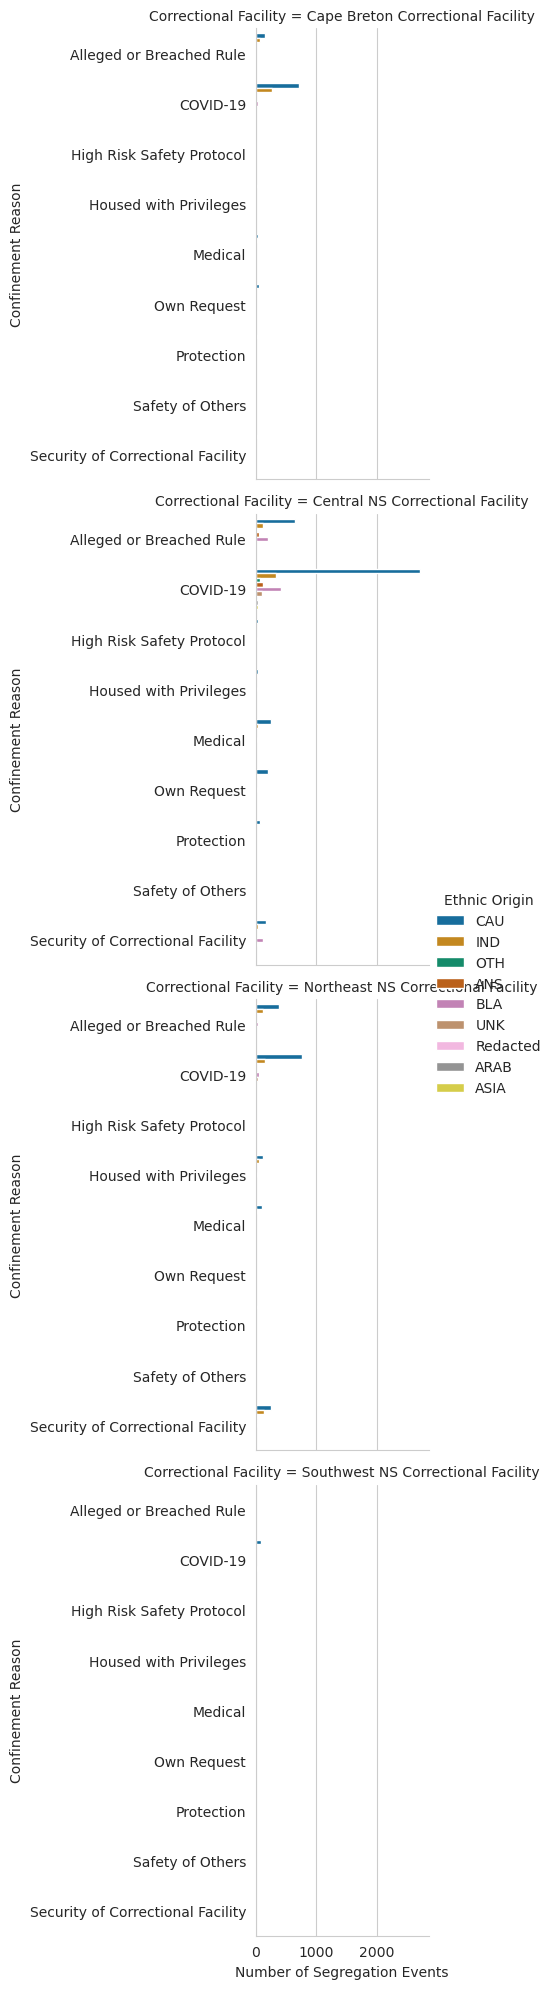

In [25]:
sns.catplot(data = seg_counts, row='Correctional Facility', y='Confinement Reason', hue='Ethnic Origin', kind='bar', x='Number of Segregation Events')

In [42]:
seg_df['Entry'] = pd.to_datetime(seg_df['Entry'], yearfirst=True)
seg_df = seg_df.sort_values(['Entry', 'Correctional Facility', 'Confinement Reason'])

In [44]:
confine_groups = seg_df.groupby(['Correctional Facility', 'Confinement Reason'])
confine_groups['Duration'] = confine_groups['Duration'].cumsum()

TypeError: 'DataFrameGroupBy' object does not support item assignment

In [57]:
# total days in seg by ethnicity per facility and reason 
total_durations = seg_df.groupby(['Correctional Facility', 'Confinement Reason']).sum()
ethnicity_sum = seg_df.groupby(['Correctional Facility', 'Confinement Reason', 'Ethnic Origin'])['Duration'].sum()
ethnicity_sum = ethnicity_sum.reset_index(level=2)
#ethnicity_sum['Duration'] / total_durations * 100 

Ethnic Origin  \
Correctional Facility              Confinement Reason                       
Cape Breton Correctional Facility  Alleged or Breached Rule           ANS   
                                   Alleged or Breached Rule           BLA   
                                   Alleged or Breached Rule           CAU   
                                   Alleged or Breached Rule           IND   
                                   Alleged or Breached Rule           OTH   
...                                                                   ...   
Southwest NS Correctional Facility COVID-19                      Redacted   
                                   COVID-19                           UNK   
                                   Housed with Privileges             CAU   
                                   Housed with Privileges             IND   
                                   Protection                         CAU   

                                                             Duration  
Correctional Facility              Confinement Reason                  
Cape Breton Correctional Facility  Alleged or Breached Rule         3  
                                   Alleged or Breached Rule         4  
                                   Alleged or Breached Rule       352  
                                   Alleged or Breached Rule       171  
                                   Alleged or Breached Rule        11  
...                                                               ...  
Southwest NS Correctional Facility COVID-19                        23  
                                   COVID-19                        15  
                                   Housed with Privileges          14  
                                   Housed with Privileges           5  
                                   Protection                       1  

[125 rows x 2 columns]

In [59]:
cb = seg_df[seg_df['Correctional Facility'] == 'Cape Breton Correctional Facility']

/tmp/ipykernel_258560/342229407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cb['Cumulative Duration'] = cb.sort_values(['Confinement Reason', 'Entry']).groupby('Confinement Reason')['Duration'].cumsum()


<AxesSubplot:xlabel='Entry', ylabel='Cumulative Duration'>

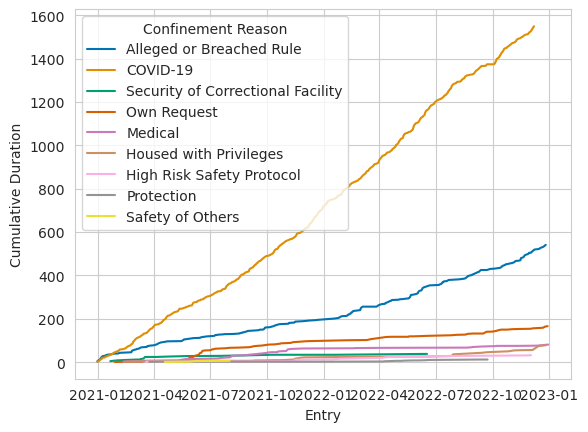

In [72]:
cb['Cumulative Duration'] = cb.sort_values(['Confinement Reason', 'Entry']).groupby('Confinement Reason')['Duration'].cumsum()
sns.lineplot(data = cb, x='Entry', y='Cumulative Duration', hue='Confinement Reason')

TypeError: 'set' object is not callable